<a href="https://colab.research.google.com/github/DangKhoa8422/END_TERM/blob/main/Gi%E1%BB%9Bi_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Giới tính/train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('f'):
    output = 0
  if file.startswith('m'):
    output = 1
  img =load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Gender_photos_train.npy',photos)
save('Gender_labels_train.npy',labels)

(250, 40, 30, 3) (250,)


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Giới tính/test/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('f'):
    output = 0
  if file.startswith('m'):
    output = 1
  img =load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Gender_photos_test.npy',photos)
save('Gender_labels_test.npy',labels)

(51, 40, 30, 3) (51,)


In [3]:
import numpy as np
x_train = np.load('/content/Gender_photos_train.npy')
y_train = np.load('/content/Gender_labels_train.npy')
x_test = np.load('/content/Gender_photos_test.npy')
y_test = np.load('/content/Gender_labels_test.npy')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(250, 40, 30, 3)
(250,)
(51, 40, 30, 3)
(51,)


#2

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

#3

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(40,30,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 8, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 8, 64)         0

In [6]:
train = model.fit(x_train, y_train, batch_size = 30, epochs = 30, verbose = 1)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',round(test_loss,3))
print('Độ chính xác:',round(test_acc*100,3),'%')

Epoch 1/30
9/9 [==============================] - 2s 94ms/step - loss: 0.7962 - accuracy: 0.5320
Epoch 2/30
9/9 [==============================] - 1s 97ms/step - loss: 0.6966 - accuracy: 0.4720
Epoch 3/30
9/9 [==============================] - 1s 89ms/step - loss: 0.6919 - accuracy: 0.5080
Epoch 4/30
9/9 [==============================] - 1s 90ms/step - loss: 0.6849 - accuracy: 0.5440
Epoch 5/30
9/9 [==============================] - 1s 91ms/step - loss: 0.6774 - accuracy: 0.6240
Epoch 6/30
9/9 [==============================] - 1s 110ms/step - loss: 0.6413 - accuracy: 0.6400
Epoch 7/30
9/9 [==============================] - 2s 182ms/step - loss: 0.6155 - accuracy: 0.6760
Epoch 8/30
9/9 [==============================] - 2s 183ms/step - loss: 0.5503 - accuracy: 0.7320
Epoch 9/30
9/9 [==============================] - 2s 260ms/step - loss: 0.5621 - accuracy: 0.7160
Epoch 10/30
9/9 [==============================] - 3s 276ms/step - loss: 0.4863 - accuracy: 0.7840
Epoch 11/30
9/9 [=======

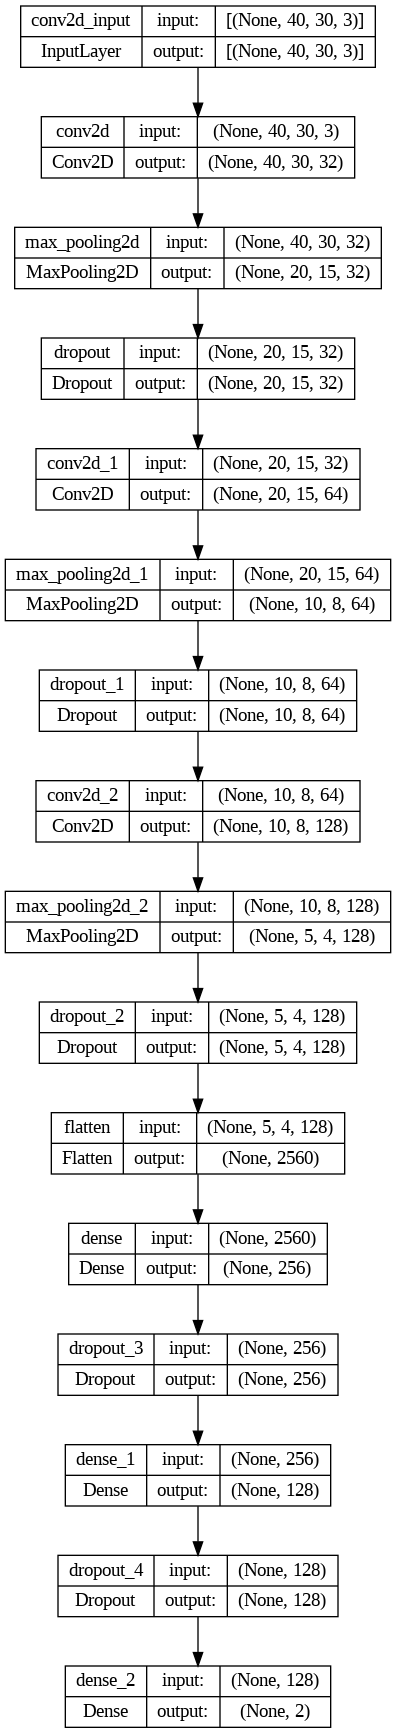

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 151ms/step
Nữ


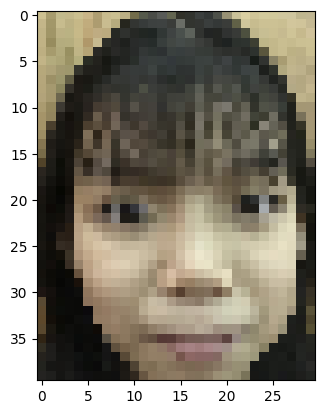

In [7]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {0: 'Nữ',1:'Nam' }
img = load_img("/content/8.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

1/1 [==============================] - 0s 124ms/step
Nữ


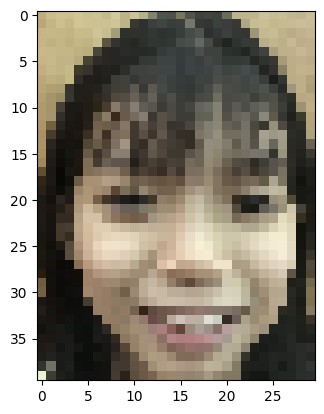

In [9]:
img = load_img("/content/9.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

1/1 [==============================] - 0s 24ms/step
Nam


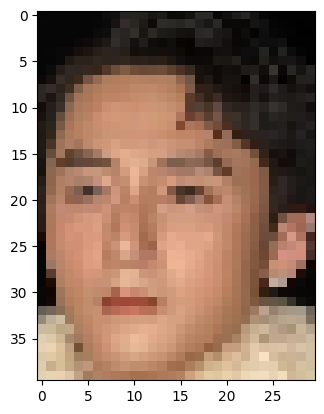

In [10]:
img = load_img("/content/5.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

1/1 [==============================] - 0s 45ms/step
Nam


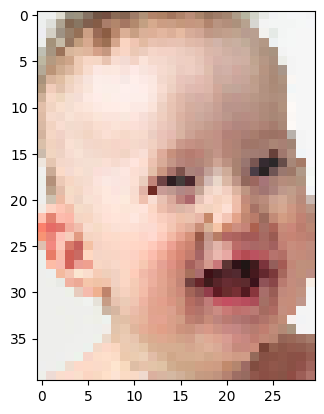

In [13]:
img = load_img("/content/3.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

In [ ]:
model.save('/content/drive/MyDrive/GENDER.h5')